In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from hmm import HiddenMarkovModel
from hmm_fb import HiddenMarkovModel_FB

%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)

In [3]:
file_name = 'household_power_consumption.txt'
data = pd.read_csv(file_name, sep=';', header=0, low_memory=False)

In [4]:
data = data.dropna(axis=0)
data = data.apply(pd.to_numeric, errors='ignore')

In [5]:
print(len(data))
print(data.dtypes)
data[:10]

2049280
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


<IPython.core.display.Javascript object>


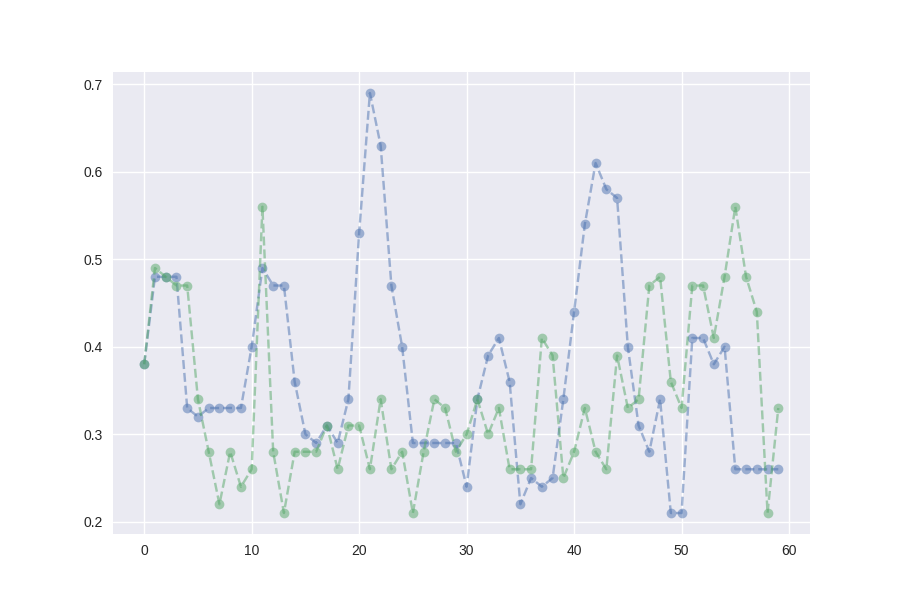

In [6]:
# Select
act_pow = data['Global_active_power'][:60]

# Normalize
act_pow = act_pow/max(data['Global_active_power'])

# Discretize (10e-2)
act_pow = [round(x, 2) for x in act_pow]

plt.plot(act_pow, '--o', alpha=0.5)

In [21]:
len_voc = 100
nbr_sta = 5

init_pi = np.random.normal(1/nbr_sta, 1/nbr_sta/10, nbr_sta)

init_T = np.random.normal(1/nbr_sta, 1/nbr_sta/10, (nbr_sta, nbr_sta))

init_E = 1/len_voc/100 * np.ones((len_voc, nbr_sta))

for s in range(nbr_sta):
    for line in init_E[s * int(len_voc / nbr_sta):(s+1) * int(len_voc / nbr_sta)]:
        line[s] = 1.0 / int(len_voc / nbr_sta)

obs_seq = [int(round(x, 2) * 100) for x in act_pow]

print('init_pi', '\n', init_pi)
print('init_T', '\n', init_T)
print('init_E', '\n', init_E)

init_pi 
 [ 0.18866445  0.21741894  0.22222046  0.21836008  0.20248856]
init_T 
 [[ 0.19566599  0.21380943  0.17091625  0.15775488  0.22246455]
 [ 0.18101631  0.22311321  0.18514907  0.21033598  0.21566461]
 [ 0.18646874  0.20017679  0.21021829  0.18355522  0.2234396 ]
 [ 0.21010007  0.2068212   0.22158507  0.20100689  0.1871925 ]
 [ 0.18998576  0.18465637  0.21240084  0.17632247  0.22755008]]
init_E 
 [[ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  0.0001]
 [ 0.05    0.0001  0.0001  0.0001  

In [26]:
model =  HiddenMarkovModel(init_T, init_E, init_pi, epsilon=0.0001, maxStep=10)

trans0, transition, emission, c = model.run_Baum_Welch_EM(obs_seq)

In [28]:
print("Reached Convergence: ")
print(c)
print()

print("Init state Maatrix: ")
print(trans0)
print()

print("Transition Matrix: ")
print(transition)
print()

print("Emission Matrix: ")
print(emission)

Reached Convergence: 
True

Init state Maatrix: 
[  1.47068952e-02   5.20225667e-31   2.26989590e-23   8.67228553e-12
   9.85293105e-01]

Transition Matrix: 
[[  1.15364034e-13   9.50298950e-13   1.00000000e+00   1.00774783e-21
    4.06881545e-15]
 [  5.94405807e-08   8.96154409e-01   1.03845531e-01   4.65748299e-29
    5.33757757e-10]
 [  2.45806768e-02   3.38557226e-01   4.64902748e-01   1.31157878e-01
    4.08014711e-02]
 [  1.09307217e-23   1.04664330e-19   4.37207807e-01   5.62792193e-01
    1.01360993e-44]
 [  2.16800570e-17   5.97933562e-22   1.00000000e+00   1.36709185e-32
    1.65705971e-39]]

Emission Matrix: 
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.000000

In [31]:
n = 60

em = emission.transpose()

profile = np.zeros(n)

state = np.random.choice(range(nbr_sta), p=trans0)

profile[0] = np.random.choice(np.arange(0, 1, 0.01), p=em[state])

for i in range(1, n):
    state = np.random.choice(range(nbr_sta), p=transition[state])
    profile[i] = np.random.choice(np.arange(0, 1, 0.01), p=em[state])

<IPython.core.display.Javascript object>


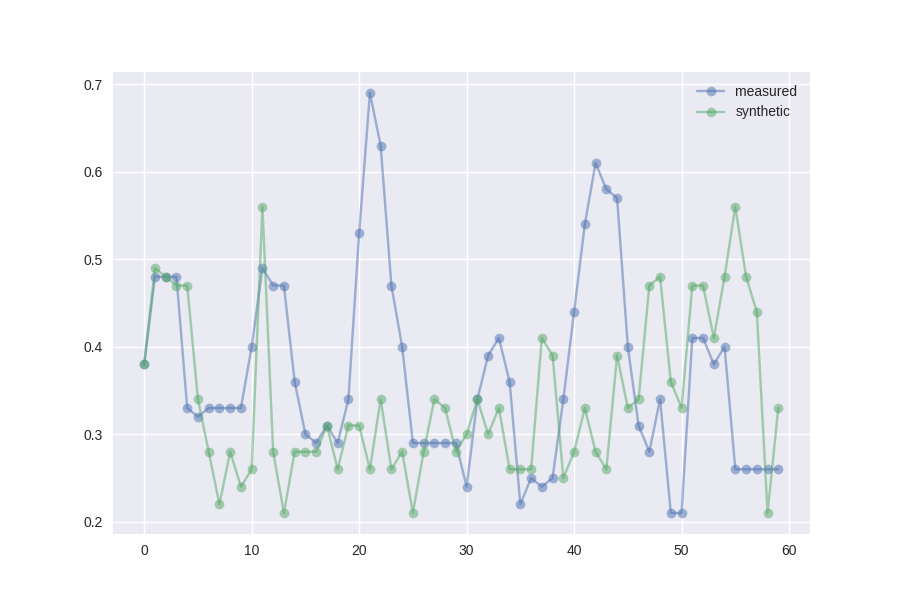

In [33]:
fig = plt.figure(2)
ax = fig.add_subplot(111)
    
ax.plot(act_pow, '-o', alpha=0.5, label='measured')
ax.plot(profile, '-o', alpha=0.5, label='synthetic')
ax.legend()